## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Data Preparation

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/RiMedAI/DeteksiDiabetes/refs/heads/main/diabetes_data.csv")
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


In [ ]:
# Select columns with 2 unique values as categorical
categorical_columns = [col for col in df.columns if df[col].nunique() == 2]

# Add 'GenHlth' and 'Age' to the categorical list
categorical_columns.append('GenHlth')
categorical_columns.append('Age')

# Consider the rest as numerical
numerical_columns = [col for col in df.columns if col not in categorical_columns]

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes', 'GenHlth', 'Age']
Numerical Columns: ['BMI', 'MentHlth', 'PhysHlth']


In [ ]:
print("Columns that have missing values:")
print(df.columns[df.isnull().any()].tolist())

Columns that have missing values:
[]


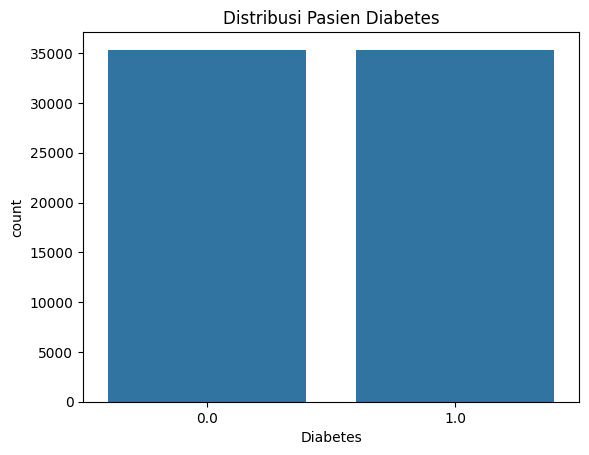

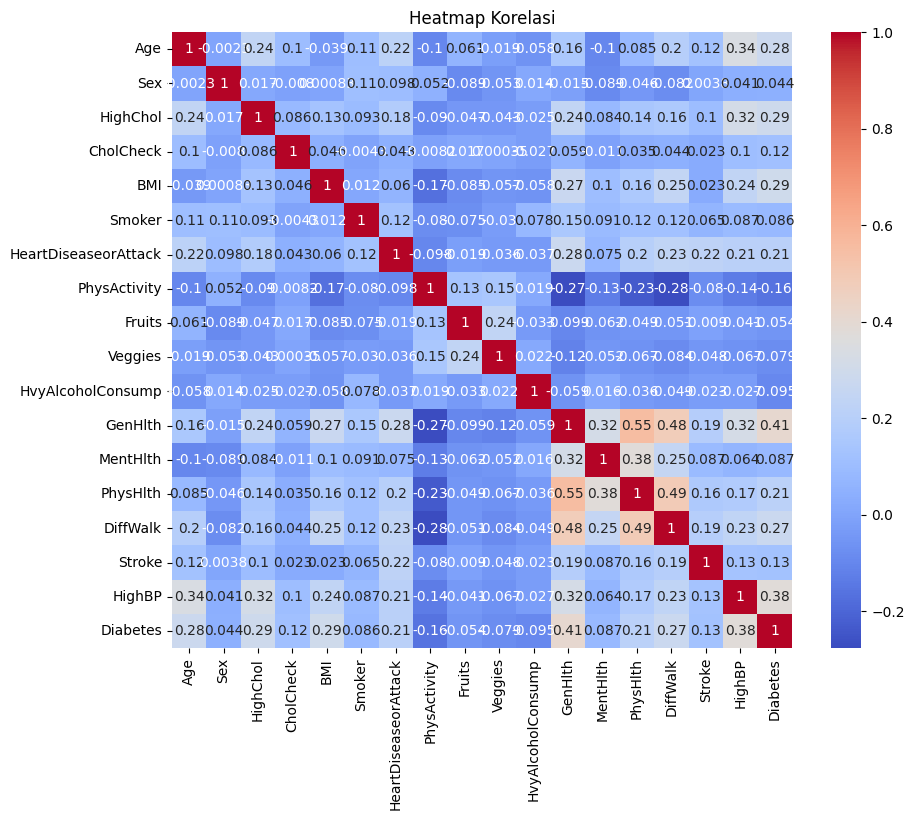

In [ ]:
# Cek distribusi target
sns.countplot(x='Diabetes', data=df)
plt.title('Distribusi Pasien Diabetes')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

In [ ]:
df1=df.drop(columns='Stroke', axis=1, inplace=False, errors='raise')
df1=df1.drop(columns='HeartDiseaseorAttack', axis=1, inplace=False, errors='raise')
df1

,Age,Sex,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0


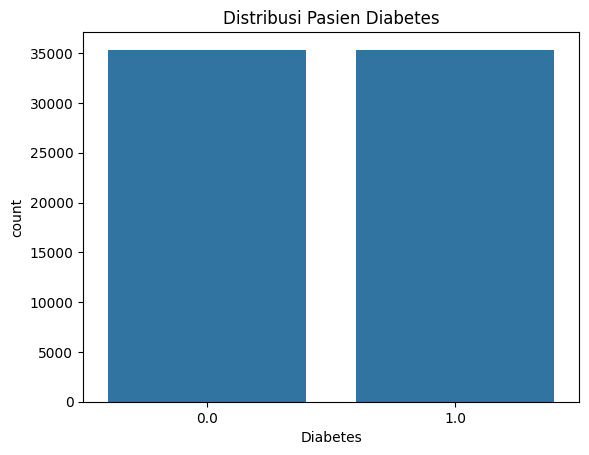

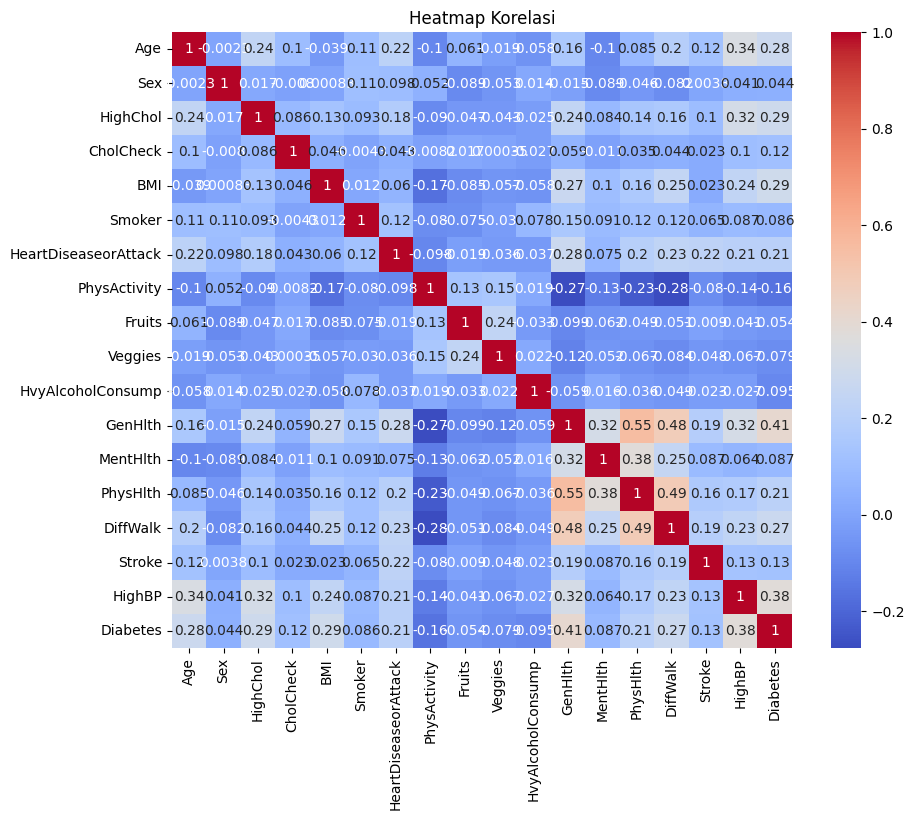

In [ ]:
# Cek distribusi target
sns.countplot(x='Diabetes', data=df)
plt.title('Distribusi Pasien Diabetes')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

## Modelling

In [ ]:
# Fitur dan label
X = df1.drop('Diabetes', axis=1)
y = df1['Diabetes']

In [ ]:
# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                               n_iter=50, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')
rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': False}


<Axes: xlabel='Feature'>

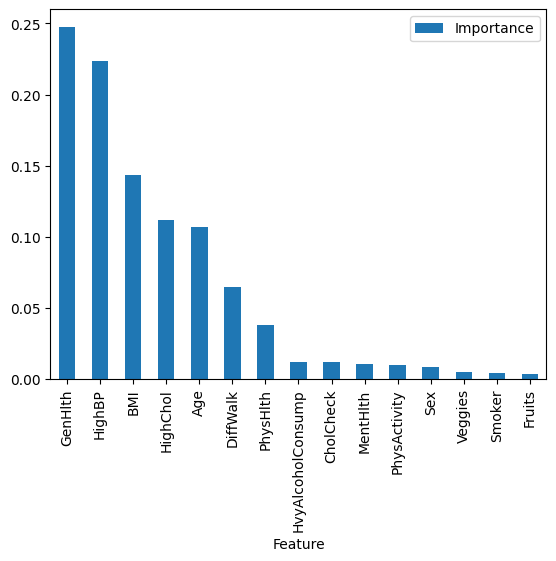

In [ ]:
importances = rf_random.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False).plot(kind='bar', x='Feature')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=10,
    bootstrap=False,
    random_state=42
)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)


Accuracy: 0.7481434330575005


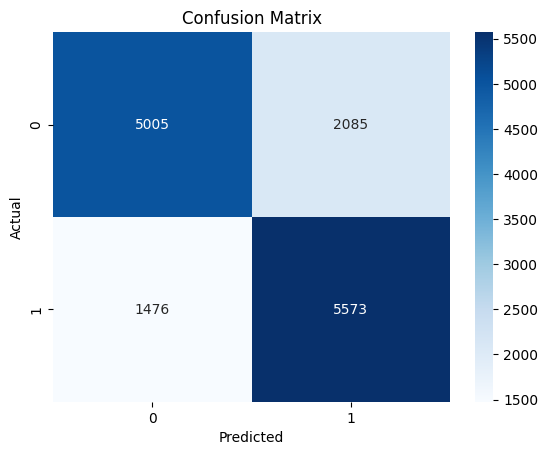

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Akurasi
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model2 = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model2.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7207 - loss: 0.5679 - val_accuracy: 0.7492 - val_loss: 0.5084
Epoch 2/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7441 - loss: 0.5214 - val_accuracy: 0.7486 - val_loss: 0.5073
Epoch 3/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7428 - loss: 0.5230 - val_accuracy: 0.7479 - val_loss: 0.5084
Epoch 4/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7448 - loss: 0.5197 - val_accuracy: 0.7502 - val_loss: 0.5061
Epoch 5/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7436 - loss: 0.5201 - val_accuracy: 0.7496 - val_loss: 0.5065
Epoch 6/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7464 - loss: 0.5149 - val_accuracy: 0.7486 - val_loss: 0.5062
Epoch 7/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7487 - loss: 0.5159 - val_accuracy: 0.7458 - val_loss: 0.5077
Epoch 8/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7492 - loss: 0

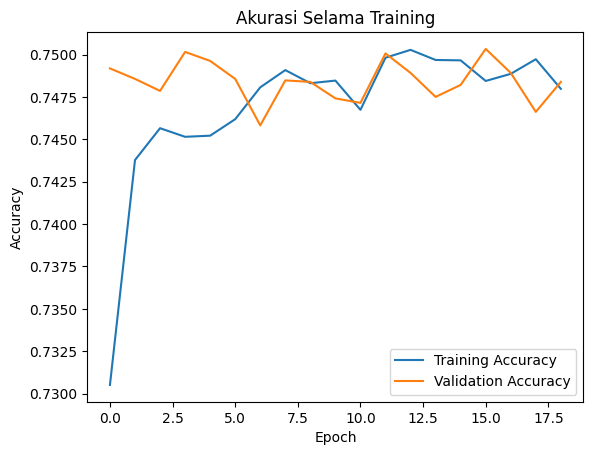

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7542 - loss: 0.5034
Test Accuracy: 0.75
442/442 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



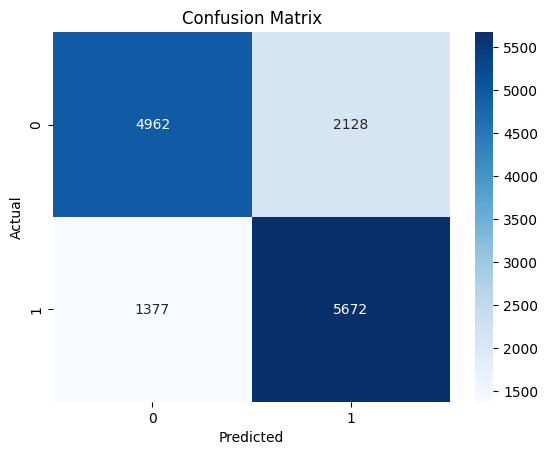

In [ ]:
# Evaluasi di data test
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

# Prediksi dan laporan
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Inference

In [ ]:
feature_names = [
    'Age',
    'Sex',
    'HighChol',
    'CholCheck',
    'BMI',
    'Smoker',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump',
    'GenHlth',
    'MentHlth',
    'PhysHlth',
    'DiffWalk',
    'HighBP',
]

# Ambil input dari keyboard
input_values = []

print("Masukkan data pasien untuk prediksi diabetes:")



for feature in feature_names:
    while True:
        try:
            value = float(input(f"Masukkan nilai {feature}: "))
            input_values.append(value)
            break
        except ValueError:
            print("Input tidak valid. Harap masukkan angka.")

Masukkan data pasien untuk prediksi diabetes:


KeyboardInterrupt: Interrupted by user

In [ ]:
# Konversi ke array dan reshape
input_array = np.array(input_values).reshape(1, -1)

# Scaling (gunakan scaler yang sudah di-fit sebelumnya)
input_scaled = scaler.transform(input_array)

# Prediksi dari model neural network
prediction_prob = model.predict(input_scaled)
prediction = (prediction_prob > 0.5).astype("int32")

# Output hasil prediksi
if prediction[0][0] == 1:
    print("\n⚠️  Prediksi: Pasien berisiko terkena diabetes.")
else:
    print("\n✅  Prediksi: Pasien tidak berisiko terkena diabetes.")

print(f"Probabilitas diabetes: {prediction_prob[0][0]:.2f}")

## Drop unimportant feature

In [ ]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [ ]:
df2 = df.drop(columns='Fruits', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='Smoker', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='Veggies', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='Sex', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='PhysActivity', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='MentHlth', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='CholCheck', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='HvyAlcoholConsump', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='PhysHlth', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='Stroke', axis=1, inplace=False, errors='raise')
df2 = df2.drop(columns='HeartDiseaseorAttack', axis=1, inplace=False, errors='raise')
df2


,Age,HighChol,BMI,GenHlth,DiffWalk,HighBP,Diabetes
0,4.0,0.0,26.0,3.0,0.0,1.0,0.0
1,12.0,1.0,26.0,3.0,0.0,1.0,0.0
2,13.0,0.0,26.0,1.0,0.0,0.0,0.0
3,11.0,1.0,28.0,3.0,0.0,1.0,0.0
4,8.0,0.0,29.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
70687,6.0,1.0,37.0,4.0,0.0,0.0,1.0
70688,10.0,1.0,29.0,2.0,1.0,0.0,1.0
70689,13.0,1.0,25.0,5.0,1.0,1.0,1.0
70690,11.0,1.0,18.0,4.0,1.0,1.0,1.0


In [ ]:
# Fitur dan label
X2 = df2.drop('Diabetes', axis=1)
y2 = df2['Diabetes']

In [ ]:
# Normalisasi
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

In [ ]:
# Split data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=10,
    bootstrap=False,
    random_state=42
)
model.fit(X_train2, y_train2)

# Prediksi
y_pred2 = model.predict(X_test2)


Accuracy: 0.7418487870429309


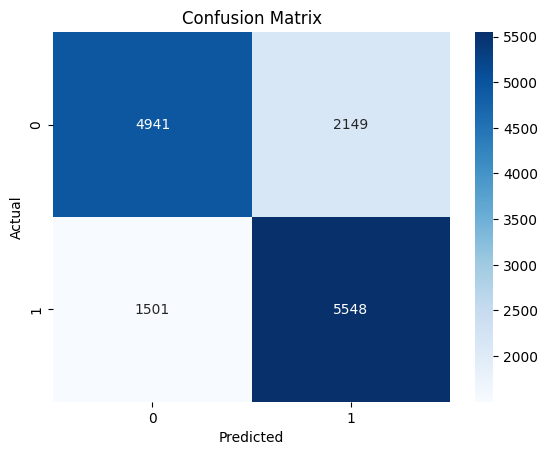

Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      7090
         1.0       0.72      0.79      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Akurasi
print("Accuracy:", accuracy_score(y_test2, y_pred2))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test2, y_pred2))


In [ ]:
from tensorflow.keras.layers import BatchNormalization

model2 = Sequential([
    Dense(128, input_shape=(X_train2.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

model2.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model2.fit(X_train2, y_train2,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop,lr_scheduler],
                    verbose=1)

Epoch 1/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7087 - loss: 0.5802 - val_accuracy: 0.7442 - val_loss: 0.5191 - learning_rate: 0.0010
Epoch 2/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7391 - loss: 0.5304 - val_accuracy: 0.7445 - val_loss: 0.5151 - learning_rate: 0.0010
Epoch 3/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7428 - loss: 0.5233 - val_accuracy: 0.7467 - val_loss: 0.5134 - learning_rate: 0.0010
Epoch 4/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7444 - loss: 0.5209 - val_accuracy: 0.7464 - val_loss: 0.5126 - learning_rate: 0.0010
Epoch 5/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7417 - loss: 0.5238 - val_accuracy: 0.7475 - val_loss: 0.5167 - learning_rate: 0.0010
Epoch 6/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7413 - loss: 0.5257 - val_accuracy: 0.7439 - val_loss: 0.5122 - learning_rate: 0.0010
Epoch 7/100
1414/1414 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7

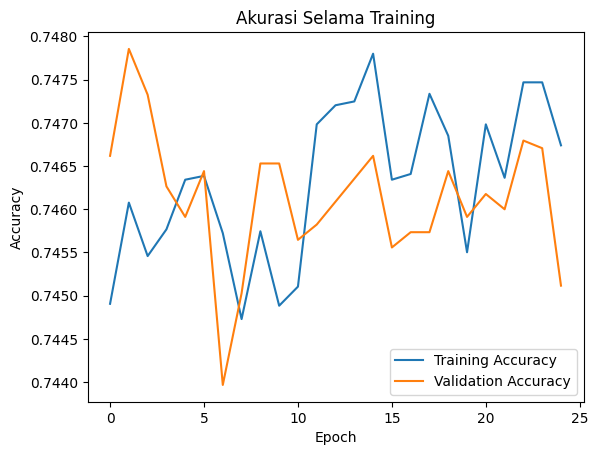

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


442/442 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7516 - loss: 0.5050
Test Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.74      7090
         1.0       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



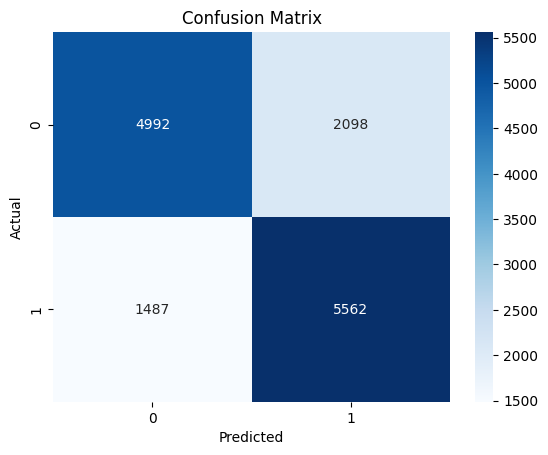

In [ ]:
# Evaluasi di data test
loss, acc = model2.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {acc:.2f}")

# Prediksi dan laporan
y_pred_prob2 = model.predict(X_test2)
y_pred2 = (y_pred_prob2 > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test2, y_pred2))

sns.heatmap(confusion_matrix(y_test2, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
